Mounted at /content/drive
Google Drive is mounted.
File path set to: /content/drive/MyDrive/Data_Analytics_Assignment.xlsx
Plots will be saved to: /content/drive/MyDrive/Internship_Plots/
File found. Loading sheets...
All sheets loaded.

Data loaded and combined successfully.
Dropping useless 'Unnamed: 0' column.
Column names loaded correctly! Proceeding to clean.

--- Step 3: Clean and Prepare Data ---
Cleaned and renamed 'Date' column to 'Date Or Hour'.
Cleaning numeric columns...

Data cleaned and prepared.
Verifying data types after cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 534 entries, 5 to 587
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date Or Hour          534 non-null    datetime64[ns]
 1   unique_idfas          534 non-null    int64         
 2   unique_ips            534 non-null    int64         
 3   unique_uas            534 non-null    int64         

/tmp/ipython-input-3125491302.py:85: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  master_df['Date'] = pd.to_datetime(master_df['Date'], errors='coerce')
/tmp/ipython-input-3125491302.py:100: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  master_df[col].replace([np.inf, -np.inf], np.nan, inplace=True)
/tmp/ipython-input-3125491302.py:101: FutureWarning: A value is trying to be set on a copy

None


--- Step 4: Analysis & Visualization ---
Generating Finding #1: Boxplots...


/tmp/ipython-input-3125491302.py:123: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=master_df, x='ivt_status', y='idfa_ua_ratio', palette="pastel")
/tmp/ipython-input-3125491302.py:128: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=master_df, x='ivt_status', y='idfa_ip_ratio', palette="pastel")


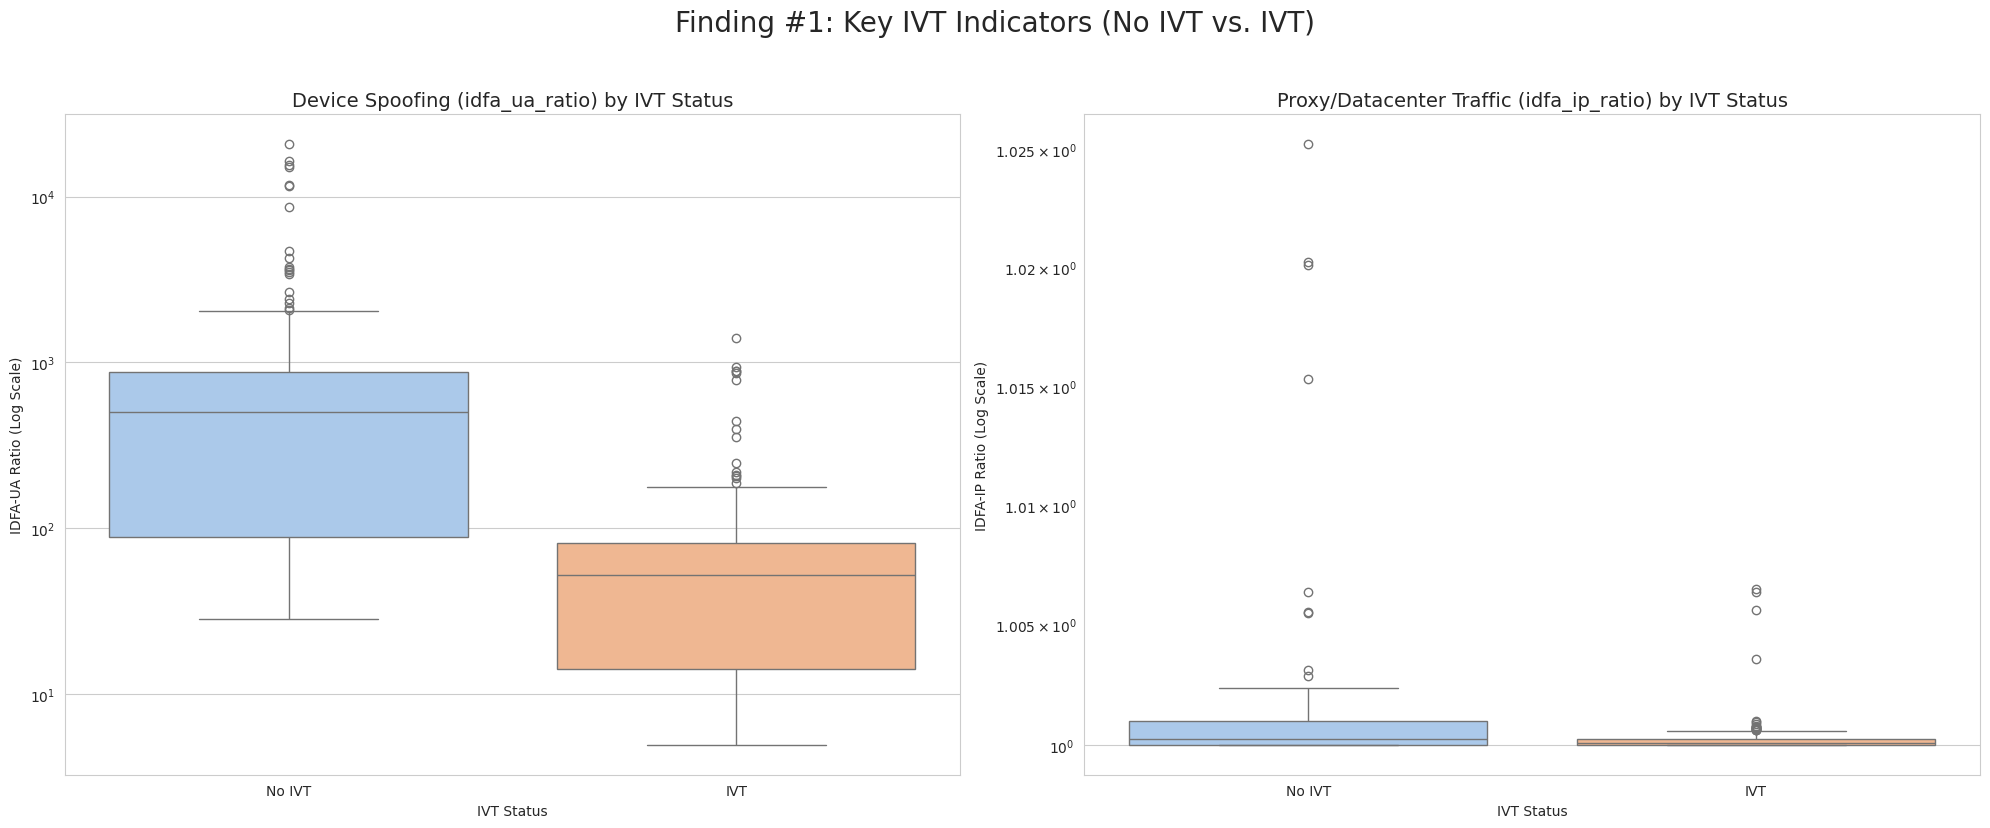

Saved plot to /content/drive/MyDrive/Internship_Plots/finding_1_boxplots.png

Generating Finding #2: Time Series...


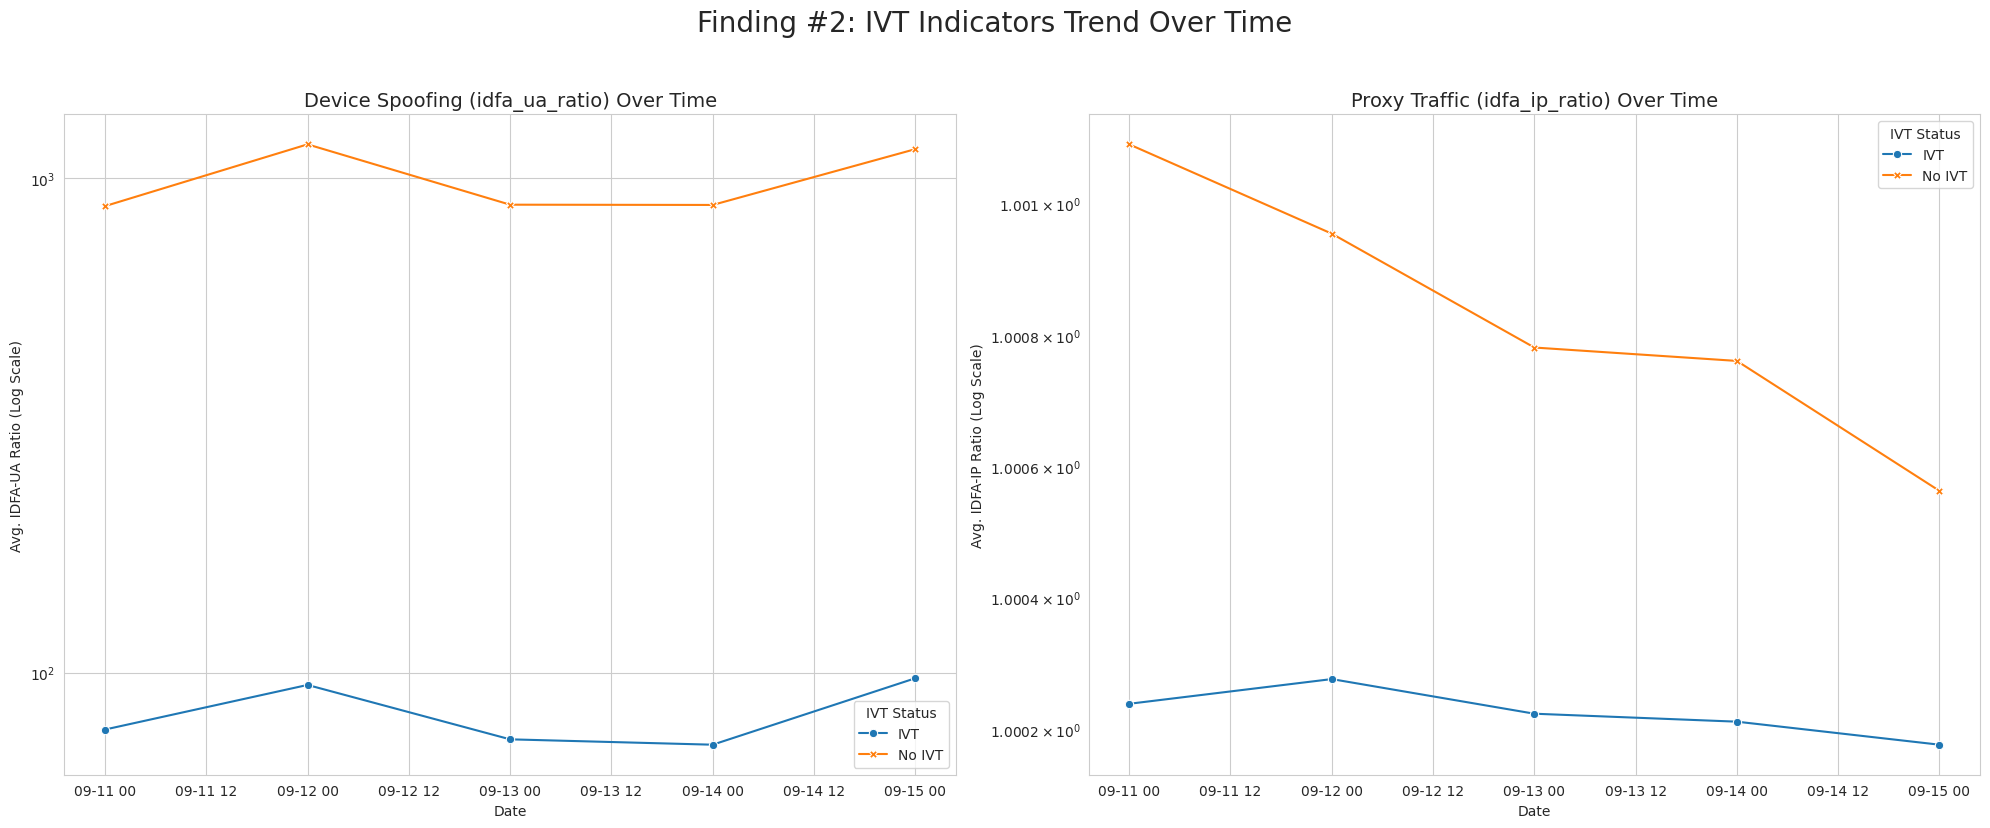

Saved plot to /content/drive/MyDrive/Internship_Plots/finding_2_time_series.png


In [1]:
# --- IMPORTS ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from google.colab import drive

# --- STEP 1: MOUNT DRIVE AND DEFINE PATHS ---
try:
    drive.mount('/content/drive', force_remount=True)
    print("Google Drive is mounted.")
except Exception as e:
    print(f"Error mounting Google Drive: {e}")

# This is your correct path
file_path = '/content/drive/MyDrive/Data_Analytics_Assignment.xlsx'
plots_dir = '/content/drive/MyDrive/Internship_Plots/'

os.makedirs(plots_dir, exist_ok=True)
print(f"File path set to: {file_path}")
print(f"Plots will be saved to: {plots_dir}")

# --- STEP 2: LOAD AND COMBINE DATA (The Correct Way) ---
sheet_names = [
    'Valid 1', 'Valid 2', 'Valid 3',
    'Invalid 1', 'Invalid 2', 'Invalid 3'
]
all_dfs = []
master_df = pd.DataFrame() # Initialize an empty DataFrame

try:
    if not os.path.exists(file_path):
        print(f"\n--- !!! FILE NOT FOUND ERROR !!! ---")
        print(f"Could not find file at: {file_path}")
    else:
        print("File found. Loading sheets...")
        excel_file = pd.ExcelFile(file_path)

        for sheet in sheet_names:

            # --- !!! THIS IS THE FIX !!! ---
            # Your output proves the headers are on the 4th row (index 3).
            # We are changing header=2 to header=3.
            df = pd.read_excel(
                excel_file,
                sheet_name=sheet,
                header=3
            )
            # --- !!! END OF FIX !!! ---

            df['app_name'] = sheet.replace(" ", "") # e.g., 'Valid1'
            df['ivt_status'] = 'IVT' if 'Invalid' in sheet else 'No IVT'
            all_dfs.append(df)

        print("All sheets loaded.")
        master_df = pd.concat(all_dfs, ignore_index=True)
        print("\nData loaded and combined successfully.")

        # --- NEW CLEANUP STEP ---
        if 'Unnamed: 0' in master_df.columns:
            print("Dropping useless 'Unnamed: 0' column.")
            master_df.drop(columns=['Unnamed: 0'], inplace=True)

        # --- !! CRITICAL CHECK !! ---
        expected_cols = ['Date', 'unique_idfas', 'unique_ips', 'unique_uas']
        assert all(col in master_df.columns for col in expected_cols)
        print("Column names loaded correctly! Proceeding to clean.")

except AssertionError:
    print("\n--- !!! LOAD FAILED !!! ---")
    print("The loaded DataFrame does not have the expected columns ('Date', 'unique_idfas', etc.).")
    print("This means the 'header=3' logic is *still* wrong.")
    print("--- RAW COLUMNS LOADED ---")
    print(master_df.columns)
except Exception as e:
    print(f"An error occurred during loading: {e}")


# --- STEP 3: CLEAN AND PREPARE DATA ---
if not master_df.empty and 'Date' in master_df.columns:
    print("\n--- Step 3: Clean and Prepare Data ---")

    # 1. Clean 'Date' Column
    master_df['Date'] = pd.to_datetime(master_df['Date'], errors='coerce')
    master_df.dropna(subset=['Date'], inplace=True) # Drop junk rows
    master_df.rename(columns={'Date': 'Date Or Hour'}, inplace=True)
    print("Cleaned and renamed 'Date' column to 'Date Or Hour'.")

    # 2. Clean Numeric Columns
    numeric_cols = [
        'unique_idfas', 'unique_ips', 'unique_uas', 'total_requests',
        'requests_per_idfa', 'impressions', 'impressions_per_idfa',
        'idfa_ip_ratio', 'idfa_ua_ratio', 'IVT'
    ]
    print("Cleaning numeric columns...")
    for col in numeric_cols:
        if col in master_df.columns:
            master_df[col] = pd.to_numeric(master_df[col], errors='coerce')
            master_df[col].replace([np.inf, -np.inf], np.nan, inplace=True)
            master_df[col].fillna(0, inplace=True)
        else:
            print(f"Warning: Column '{col}' not found. Skipping.")

    print("\nData cleaned and prepared.")
    print("Verifying data types after cleaning:")
    display(master_df.info())
else:
    print("\nSkipping Step 3 & 4 because 'master_df' did not load correctly in Step 2.")


# --- STEP 4: ANALYSIS & VISUALIZATION ---
if not master_df.empty and 'Date Or Hour' in master_df.columns:
    print("\n--- Step 4: Analysis & Visualization ---")

    sns.set_style("whitegrid")

    # --- Finding #1: Overall Metric Comparison (Boxplots) ---
    print("Generating Finding #1: Boxplots...")
    plt.figure(figsize=(20, 8))

    plt.subplot(1, 2, 1)
    sns.boxplot(data=master_df, x='ivt_status', y='idfa_ua_ratio', palette="pastel")
    plt.title('Device Spoofing (idfa_ua_ratio) by IVT Status', fontsize=14)
    plt.xlabel("IVT Status"); plt.ylabel("IDFA-UA Ratio (Log Scale)"); plt.yscale('log')

    plt.subplot(1, 2, 2)
    sns.boxplot(data=master_df, x='ivt_status', y='idfa_ip_ratio', palette="pastel")
    plt.title('Proxy/Datacenter Traffic (idfa_ip_ratio) by IVT Status', fontsize=14)
    plt.xlabel("IVT Status"); plt.ylabel("IDFA-IP Ratio (Log Scale)"); plt.yscale('log')

    plt.suptitle('Finding #1: Key IVT Indicators (No IVT vs. IVT)', fontsize=20, y=1.03)
    plt.tight_layout()
    plot_path1 = os.path.join(plots_dir, 'finding_1_boxplots.png')
    plt.savefig(plot_path1, bbox_inches='tight')
    plt.show()
    print(f"Saved plot to {plot_path1}")

    # --- Finding #2: Time Series Analysis (The "When") ---
    print("\nGenerating Finding #2: Time Series...")
    g = pd.Grouper(key='Date Or Hour', freq='D')
    daily_avg_df = master_df.groupby(['ivt_status', g]).mean(numeric_only=True).reset_index()

    plt.figure(figsize=(20, 8))

    plt.subplot(1, 2, 1)
    sns.lineplot(data=daily_avg_df, x='Date Or Hour', y='idfa_ua_ratio', hue='ivt_status', style='ivt_status', markers=True, dashes=False)
    plt.title('Device Spoofing (idfa_ua_ratio) Over Time', fontsize=14)
    plt.xlabel('Date'); plt.ylabel('Avg. IDFA-UA Ratio (Log Scale)'); plt.yscale('log'); plt.legend(title='IVT Status')

    plt.subplot(1, 2, 2)
    sns.lineplot(data=daily_avg_df, x='Date Or Hour', y='idfa_ip_ratio', hue='ivt_status', style='ivt_status', markers=True, dashes=False)
    plt.title('Proxy Traffic (idfa_ip_ratio) Over Time', fontsize=14)
    plt.xlabel('Date'); plt.ylabel('Avg. IDFA-IP Ratio (Log Scale)'); plt.yscale('log'); plt.legend(title='IVT Status')

    plt.suptitle('Finding #2: IVT Indicators Trend Over Time', fontsize=20, y=1.03)
    plt.tight_layout()
    plot_path2 = os.path.join(plots_dir, 'finding_2_time_series.png')
    plt.savefig(plot_path2, bbox_inches='tight')
    plt.show()
    print(f"Saved plot to {plot_path2}")
else:
    print("\nSkipping Step 4 because data was not cleaned successfully.")
